In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
train = pd.read_csv('data/titanic/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


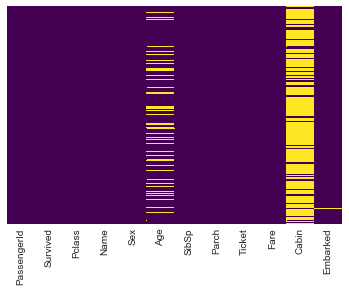

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
sns.set_style('whitegrid')

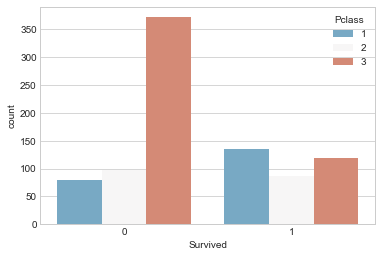

In [77]:
sns.countplot(x='Survived', hue= 'Pclass', data=train, palette = 'RdBu_r')

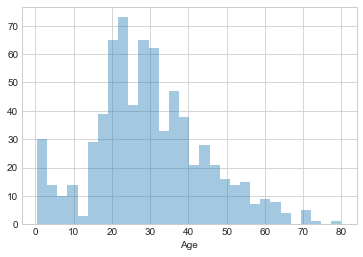

In [78]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

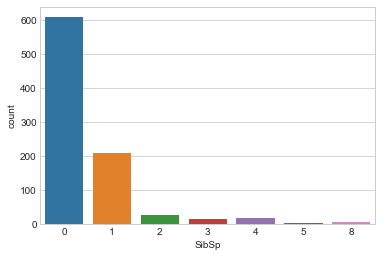

In [79]:
sns.countplot(x='SibSp', data=train)

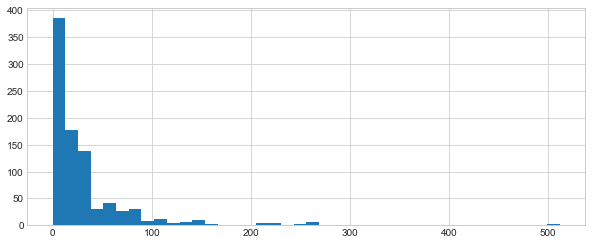

In [80]:
train['Fare'].hist(bins=40,figsize=(10,4))

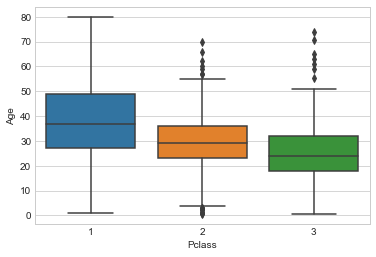

In [81]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [82]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [83]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

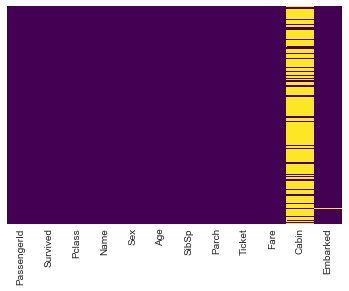

In [84]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [85]:
train.dropna(inplace=True)

In [86]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [87]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [88]:
train = pd.concat([train,sex,embark],axis=1)

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [90]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [91]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [92]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [93]:
from sklearn.cross_validation import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logmodel = LogisticRegression()

In [97]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
predictions = logmodel.predict(X_test)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.58      0.55      0.56        20
          1       0.79      0.80      0.80        41

avg / total       0.72      0.72      0.72        61

